```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [1]:
!pip install transformers sentencepiece

In [2]:
import torch, sentencepiece
from transformers import MarianMTModel, MarianTokenizer

# Diagram

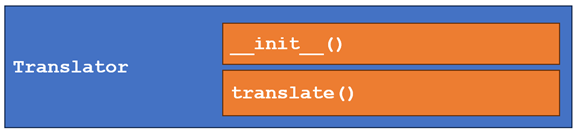

# Code

In [3]:
class Translator:
    def __init__(self, source_lang, target_lang):
        model_name = f'Helsinki-NLP/opus-mt-{source_lang}-{target_lang}'
        self.model = MarianMTModel.from_pretrained(model_name)
        self.tokenizer = MarianTokenizer.from_pretrained(model_name)

    def translate(self, text):
        tokens = self.tokenizer.encode(text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
        translation_ids = self.model.generate(tokens)
        translation = self.tokenizer.decode(translation_ids[0], skip_special_tokens=True)
        return translation

In [4]:
def main():
    source_lang = input("Enter source language (e.g., 'en' for English): ").strip().lower()
    target_lang = input(f"Enter target language (e.g., 'fr' for French): ").strip().lower()
    translator = Translator(source_lang, target_lang)

    while True:
        text_to_translate = input("\nEnter the text you want to translate (or type 'exit' to stop): ")

        if text_to_translate.lower() == 'exit':
            break

        translated_text = translator.translate(text_to_translate)
        print(f"\nTranslated text ({source_lang} to {target_lang}):\n{translated_text}")


# Execution

In [ ]:
main()

Enter source language (e.g., 'en' for English): en
Enter target language (e.g., 'fr' for French): fr


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Enter the text you want to translate (or type 'exit' to stop): He thus came to be known as the Missile Man of India for his work on the development of ballistic missile and launch vehicle technology. He also played a pivotal organisational, technical, and political role in India's Pokhran-II nuclear tests in 1998, the first since the original nuclear test by India in 1974

Translated text (en to fr):
Il est ainsi connu sous le nom d'homme des missiles de l'Inde pour ses travaux sur le développement de la technologie des missiles balistiques et des lanceurs. Il a également joué un rôle central sur les plans organisationnel, technique et politique dans les essais nucléaires de Pokhran-II en Inde en 1998, le premier depuis l'essai nucléaire initial de l'Inde en 1974.
